# This file will contain simulations of various experiments


## Introduction

Here, we will

In [1]:
import sys
import os
import time
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint
import itertools
import imp
import biofilm_functions as bio


## Experiment 0

This is to test the functions. 


z mic plankton: [ 1.  4.  3. 12.  2.  8.  6. 24.]
z mic biofilm: [ 6.  9.  8. 17.  7. 13. 11. 29.]
running stochastic simulation
initiated
[[1. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 0. 1.]]
this is concentration 2.0
this is concentration 1.9992001599786688
this is concentration 1.9984006398293674
this is concentration 1.9976014394241728
this is concentration 1.9968025586352127
this is concentration 1.9960039973346662
this is concentration 1.9952057553947635
this is concentration 1.9944078326877859
this is concentration 1.9936102290860658
this is concentration 1.9928129444619866
this is concentration 1.992015978687983
this is concentration 1.99121933163654
this is concentration 1.9904230031801944
this is concentration 1.9896269931915336
this is concentration 1.9888313015431958
this is concentration 1.9880359281078706
this is concentration 1.987240872758298
this is concentration 1.986

this is concentration 1.735242512971828
this is concentration 1.734548554767533
this is concentration 1.7338548740910102
this is concentration 1.7331614708312713
this is concentration 1.7324683448773712
this is concentration 1.73177549611841
this is concentration 1.731082924443532
this is concentration 1.7303906297419254
this is concentration 1.7296986119028235
this is concentration 1.7290068708155029
this is concentration 1.7283154063692854
this is concentration 1.7276242184535369
this is concentration 1.7269333069576667
this is concentration 1.7262426717711294
this is concentration 1.7255523127834234
this is concentration 1.7248622298840908
this is concentration 1.7241724229627189
this is concentration 1.7234828919089384
this is concentration 1.7227936366124241
this is concentration 1.7221046569628955
this is concentration 1.7214159528501156
this is concentration 1.7207275241638917
this is concentration 1.7200393707940755
this is concentration 1.7193514926305624
this is concentration

this is concentration 1.5458086640312625
this is concentration 1.545190464213856
this is concentration 1.5445725116269273
this is concentration 1.5439548061716035
this is concentration 1.5433373477490524
this is concentration 1.5427201362604799
this is concentration 1.5421031716071325
this is concentration 1.541486453690296
this is concentration 1.5408699824112952
this is concentration 1.540253757671495
this is concentration 1.5396377793722993
this is concentration 1.5390220474151517
this is concentration 1.5384065617015348
this is concentration 1.537791322132971
this is concentration 1.5371763286110223
this is concentration 1.5365615810372892
this is concentration 1.5359470793134122
this is concentration 1.5353328233410715
this is concentration 1.5347188130219858
this is concentration 1.5341050482579133
this is concentration 1.5334915289506519
this is concentration 1.5328782550020383
this is concentration 1.5322652263139487
this is concentration 1.5316524427882987
this is concentratio

this is concentration 1.3721065416600708
this is concentration 1.3715578087972957
this is concentration 1.3710092953837731
this is concentration 1.3704610013317406
this is concentration 1.3699129265534713
this is concentration 1.369365070961273
this is concentration 1.368817434467489
this is concentration 1.3682700169844977
this is concentration 1.3677228184247117
this is concentration 1.3671758387005797
this is concentration 1.3666290777245849
this is concentration 1.3660825354092452
this is concentration 1.3655362116671144
this is concentration 1.3649901064107801
this is concentration 1.3644442195528659
this is concentration 1.3638985510060297
this is concentration 1.3633531006829644
this is concentration 1.3628078684963985
this is concentration 1.3622628543590942
this is concentration 1.3617180581838495
this is concentration 1.3611734798834971
this is concentration 1.3606291193709044
this is concentration 1.3600849765589738
this is concentration 1.359541051360642
this is concentrati

this is concentration 1.2316406970368057
this is concentration 1.2311481392761106
this is concentration 1.2306557784991203
this is concentration 1.2301636146270574
this is concentration 1.2296716475811753
this is concentration 1.2291798772827593
this is concentration 1.2286883036531264
this is concentration 1.2281969266136248
this is concentration 1.227705746085634
this is concentration 1.2272147619905653
this is concentration 1.226723974249861
this is concentration 1.2262333827849952
this is concentration 1.2257429875174735
this is concentration 1.225252788368832
this is concentration 1.2247627852606395
this is concentration 1.2242729781144954
this is concentration 1.2237833668520302
this is concentration 1.2232939513949064
this is concentration 1.2228047316648172
this is concentration 1.222315707583488
this is concentration 1.2218268790726745
this is concentration 1.2213382460541642
this is concentration 1.2208498084497759
this is concentration 1.2203615661813596
this is concentratio

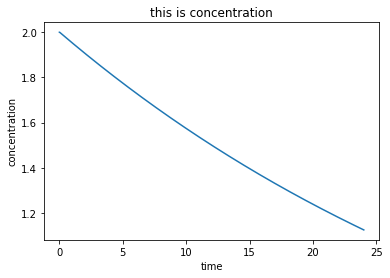

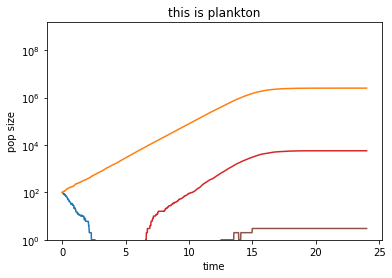

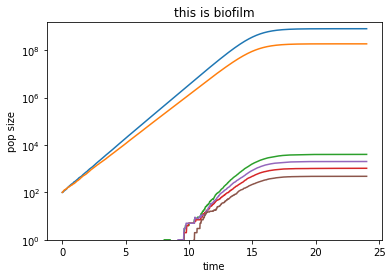

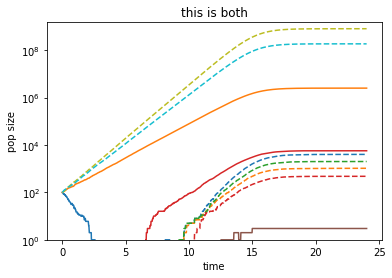

running deterministic simulation


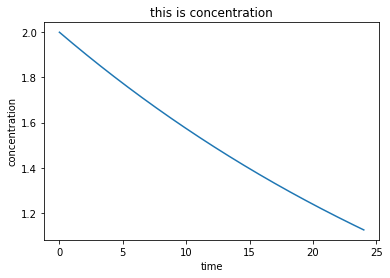

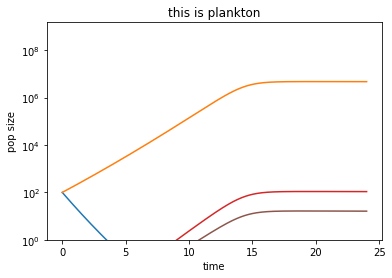

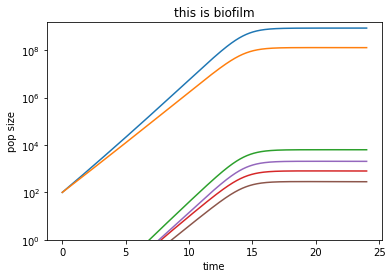

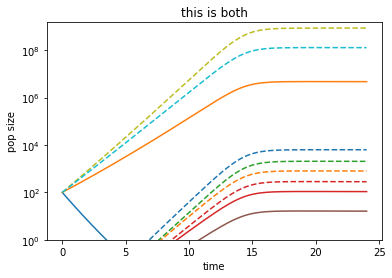

In [14]:
def run_experiment_0(name='experiment'):
    

    ####### GENERAL PROPERTIES OF THE POPULATION ########
    loci=3
    mutation_rate=0.0000010
    cost_vector=[0.5,0.2,0.2]   #loc_costs = 0 * c_c * np.random.rand(k) + c_c
    benefit_vector=[2,3,4]  
    biofilm_benefit=5
    biofilm_cost=0.01
    psi_max_s=0.0231 
    psi_min=-0.0833
    gamma=0.00007
    release_rate=0#0.1
    adhesion_rate=0#0.1##0.00000001

    MIC = 1.0
    ##############################

    init_pop=np.zeros(2**loci)
    car_cap=10**9
    
    ######### PROPERTIES OF THE EXPERIMENT, INCLUDING THE DRUG PARAMETERS #######
    #### non of this matters for the red and green experiement?
    kappa=1.5
    cycle_length = 24 * 60  # length of a cycle in minutes
    init_conc = 0.0 * MIC  # intitial antibiotic concentration
    
    degradation_rate=-0.0004
    concentration_gradient=[2]
    cycle_number=len(concentration_gradient)
    
    
    ########## SPECIFICS OF THIS EXPERIMENT #####################################
    ############ Starting population initialization  ###############

    living_style=0
    init_pop=np.zeros(2**loci)
    init_pop[0]=100  #
    init_pop[1]=100  #
    my_pla_population=bio.Bacterial_population(init_pop,loci=loci,psi_max_s=psi_max_s, psi_min=psi_min, gamma=gamma, MIC = MIC, cost_vector=cost_vector,benefit_vector=benefit_vector, mutation_rate=mutation_rate, living_style=living_style, biofilm_benefit=biofilm_benefit, biofilm_cost=biofilm_cost, release_rate=release_rate, adhesion_rate=adhesion_rate)
    my_pla_population2=bio.Bacterial_population(init_pop,loci=loci,psi_max_s=psi_max_s, psi_min=psi_min, gamma=gamma, MIC = MIC, cost_vector=cost_vector,benefit_vector=benefit_vector, mutation_rate=mutation_rate, living_style=living_style, biofilm_benefit=biofilm_benefit, biofilm_cost=biofilm_cost, release_rate=release_rate, adhesion_rate=adhesion_rate)
    print ('z mic plankton:', my_pla_population.z_mic)
    # Define Biofilm population - it is empty

    living_style=1
    init_pop=np.zeros(2**loci)
    init_pop[0]=100
    init_pop[1]=100
    my_bio_population=bio.Bacterial_population(init_pop,loci=loci,psi_max_s=psi_max_s, psi_min=psi_min, gamma=gamma, MIC = MIC, cost_vector=cost_vector,benefit_vector=benefit_vector, mutation_rate=mutation_rate, living_style=living_style, biofilm_benefit=biofilm_benefit, biofilm_cost=biofilm_cost, release_rate=release_rate, adhesion_rate=adhesion_rate)
    my_bio_population2=bio.Bacterial_population(init_pop,loci=loci,psi_max_s=psi_max_s, psi_min=psi_min, gamma=gamma, MIC = MIC, cost_vector=cost_vector,benefit_vector=benefit_vector, mutation_rate=mutation_rate, living_style=living_style, biofilm_benefit=biofilm_benefit, biofilm_cost=biofilm_cost, release_rate=release_rate, adhesion_rate=adhesion_rate)
    print ('z mic biofilm:', my_bio_population.z_mic)
    #Run this 
    
    my_treatment=bio.Treatment(concentration_gradient, cycle_length=cycle_length , cycle_number=cycle_number, car_cap=car_cap,kappa=kappa, degradation_rate=degradation_rate)
    my_treatment2=bio.Treatment(concentration_gradient, cycle_length=cycle_length , cycle_number=cycle_number, car_cap=car_cap,kappa=kappa, degradation_rate=degradation_rate)
    my_treatment.run_stochastic_simulation(my_pla_population, my_bio_population)
    my_treatment.plot_results() 
    
    #plt.semilogy(my_treatment.pla_population_record)
    #plt.title('plankton')
    #plt.show()
    #plt.semilogy(my_treatment.bio_population_record, ':')
    #plt.title('biofilm')
    #plt.legend(['pla g', 'pla r', 'bio g', 'bio r'])
    #plt.show()
    
    my_treatment2.run_deterministic_simulation(my_pla_population2, my_bio_population2)
    my_treatment2.plot_results() 
    #np.save(name,complete_dynamics)
    
    return (my_treatment.pla_population_record,my_treatment.pla_population_record)

imp.reload(bio)
test=run_experiment_0(name='test')

## Experiment Single treatment

In this experiment, I will again run all 4 scenarios - only genetics, genetic plus EPS, genetic + physio, genetic + both. 

All fancy interesting stuff should be included - e.g. degradation rate, dilutions (to original pop size?) 

So all together 4 experiments will be run in this scenario, each 100 times?  





In [7]:
def single_treatment_experiment(name= 'single_treatment_test', concentration_gradient = [0], init_pla=0, init_bio=1000):
    start = time.time()
    print ('starting')
    
    ####### GENERAL PROPERTIES OF THE POPULATION ########
    loci=4
    mutation_rate=0.0000010
    cost_vector=[0.1,0.1,0.1,0.1]   #loc_costs = 0 * c_c * np.random.rand(k) + c_c
    benefit_vector=[2,2,2,2] 
    if len(cost_vector)>1 &len(cost_vector)<loci:
        print ('cost vector length does not match the number of loci')
    if len(benefit_vector)>1 &len(benefit_vector)<loci:
        print ('benefit vector length does not match the number of loci')

    biofilm_benefit=5
    biofilm_cost=0.5
    psi_max_s=0.0231 
    psi_min=-0.0833
    gamma=0.00007
    release_rate=0#0.1
    adhesion_rate=0#0.1##0.00000001

    MIC = 1.0
    
    ######### PROPERTIES OF THE EXPERIMENT, INCLUDING THE DRUG PARAMETERS #######
    #### non of this matters for the red and green experiement?
    kappa=1.5
    cycle_length = 7*24 * 60  # length of a cycle in minutes
    init_conc = 2 * MIC  # intitial antibiotic concentration
    car_cap=10**9
    
    degradation_rate=-0.0004
    #concentration_gradient=[0,2,3,5,8,10,12,14,16,18,20]
    cycle_number=len(concentration_gradient)
    
    
    ########## SPECIFICS OF THIS EXPERIMENT #####################################
    ############ Starting population initialization  ###############

    living_style=0
    init_pop=np.zeros(2**loci)
    init_pop[0]=init_pla  #
    my_pla_population=bio.Bacterial_population(init_pop,loci=loci,psi_max_s=psi_max_s, psi_min=psi_min, gamma=gamma, MIC = MIC, cost_vector=cost_vector,benefit_vector=benefit_vector, mutation_rate=mutation_rate, living_style=living_style, biofilm_benefit=biofilm_benefit, biofilm_cost=biofilm_cost, release_rate=release_rate, adhesion_rate=adhesion_rate)
    print ('z_mic plankton:', my_pla_population.z_mic)
    
    living_style=1
    init_pop=np.zeros(2**loci)
    init_pop[0]=init_bio
    my_bio_population=bio.Bacterial_population(init_pop,loci=loci,psi_max_s=psi_max_s, psi_min=psi_min, gamma=gamma, MIC = MIC, cost_vector=cost_vector,benefit_vector=benefit_vector, mutation_rate=mutation_rate, living_style=living_style, biofilm_benefit=biofilm_benefit, biofilm_cost=biofilm_cost, release_rate=release_rate, adhesion_rate=adhesion_rate)
    print ('z_mic biofilm:', my_bio_population.z_mic)

    my_treatment=bio.Treatment(concentration_gradient, cycle_length=cycle_length , cycle_number=cycle_number, car_cap=car_cap,kappa=kappa, degradation_rate=degradation_rate)

    #Run this 
    my_treatment.run_stochastic_simulation(my_pla_population, my_bio_population)
    my_treatment.plot_results() 
    
    #plt.semilogy(my_treatment.pla_population_record)
    #plt.title('plankton')
    #plt.show()
    #plt.semilogy(my_treatment.bio_population_record, ':')
    #plt.title('biofilm')
    #plt.legend(['pla g', 'pla r', 'bio g', 'bio r'])
    #plt.show()
    
    #my_treatment2.run_deterministic_simulation(my_pla_population2, my_bio_population2)
    #my_treatment2.plot_results() 
    #np.save(name,complete_dynamics)
    
    
    
    
    end = time.time()
    print ('finished in ', end - start)
    my_treatment.save_output(name)
    return (my_treatment.pla_population_record,my_treatment.pla_population_record, my_treatment.time, my_treatment.concentration_record)

running simulation no: 0
starting
cost vector length does not match the number of loci
benefit vector length does not match the number of loci
z_mic plankton: [ 1.  2.  2.  4.  2.  4.  4.  8.  2.  4.  4.  8.  4.  8.  8. 16.]
z_mic biofilm: [ 6.  7.  7.  9.  7.  9.  9. 13.  7.  9.  9. 13.  9. 13. 13. 21.]
running stochastic simulation
initiated
[[1. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 0. 1.]]
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


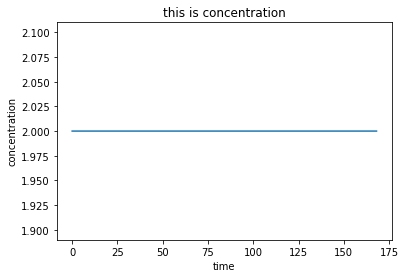

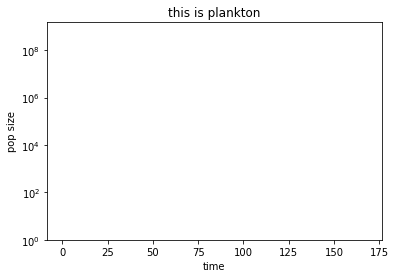

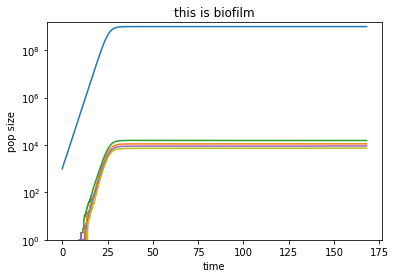

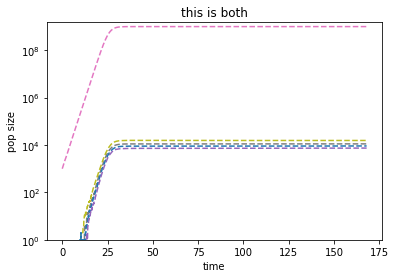

finished in  10.298533916473389
all saved as single_treatment_test0


In [8]:
imp.reload(bio)

name='single_treatment_test'
for i in range (1):
    print ('running simulation no:',i)
    [plankton_p, biofilm_p, time_r, conc_r]=single_treatment_experiment(name= name+str(i), concentration_gradient=[2])
    np.savetxt(name+'_time.txt', time_r)
    np.savetxt(name+'_conc.txt', conc_r)

## Experiment Passages
Here I will define a typical passage experiment

In [41]:
def passage_experiment(name='test0', concentration_gradient=[0,0,0], init_pla=1000, init_bio=1000):
    start = time.time()
    print ('starting')
    
    ####### GENERAL PROPERTIES OF THE POPULATION ########
    loci=4
    mutation_rate=0.0000010
    cost_vector=[0.1,0.1,0.1,0.1]   #loc_costs = 0 * c_c * np.random.rand(k) + c_c
    benefit_vector=[2,3,4,5] 
    if len(cost_vector)>1 &len(cost_vector)<loci:
        print ('cost vector length does not match the number of loci')
    if len(benefit_vector)>1 &len(benefit_vector)<loci:
        print ('benefit vector length does not match the number of loci')

    biofilm_benefit=5
    biofilm_cost=0.05
    psi_max_s=0.0231 
    psi_min=-0.0833
    gamma=0.00007
    release_rate=0#0.1
    adhesion_rate=0#0.1##0.00000001

    MIC = 1.0
    
    ######### PROPERTIES OF THE EXPERIMENT, INCLUDING THE DRUG PARAMETERS #######
    #### non of this matters for the red and green experiement?
    kappa=1.5
    cycle_length = 24 * 60  # length of a cycle in minutes
    init_conc = 0.0 * MIC  # intitial antibiotic concentration
    car_cap=10**9
    
    degradation_rate=0#-0.000004
    #concentration_gradient=[0,2,3,5,8,10,12,14,16,18,20]
    cycle_number=len(concentration_gradient)
    
    
    ########## SPECIFICS OF THIS EXPERIMENT #####################################
    ############ Starting population initialization  ###############

    living_style=0
    init_pop=np.zeros(2**loci)
    init_pop[0]=init_pla  #
    my_pla_population=bio.Bacterial_population(init_pop,loci=loci,psi_max_s=psi_max_s, psi_min=psi_min, gamma=gamma, MIC = MIC, cost_vector=cost_vector,benefit_vector=benefit_vector, mutation_rate=mutation_rate, living_style=living_style, biofilm_benefit=biofilm_benefit, biofilm_cost=biofilm_cost, release_rate=release_rate, adhesion_rate=adhesion_rate)
    print ('z_mic plankton:', my_pla_population.z_mic)
    # Define Biofilm population - it is empty

    living_style=1
    init_pop=np.zeros(2**loci)
    init_pop[0]=init_bio
    my_bio_population=bio.Bacterial_population(init_pop,loci=loci,psi_max_s=psi_max_s, psi_min=psi_min, gamma=gamma, MIC = MIC, cost_vector=cost_vector,benefit_vector=benefit_vector, mutation_rate=mutation_rate, living_style=living_style, biofilm_benefit=biofilm_benefit, biofilm_cost=biofilm_cost, release_rate=release_rate, adhesion_rate=adhesion_rate)
    print ('z_mic biofilm:', my_bio_population.z_mic)

    my_treatment=bio.Treatment(concentration_gradient, cycle_length=cycle_length , cycle_number=cycle_number, car_cap=car_cap,kappa=kappa, degradation_rate=degradation_rate)

    #Run this 
    my_treatment.run_stochastic_simulation(my_pla_population, my_bio_population)
    my_treatment.plot_results() 
    
    #plt.semilogy(my_treatment.pla_population_record)
    #plt.title('plankton')
    #plt.show()
    #plt.semilogy(my_treatment.bio_population_record, ':')
    #plt.title('biofilm')
    #plt.legend(['pla g', 'pla r', 'bio g', 'bio r'])
    #plt.show()
    
    #my_treatment2.run_deterministic_simulation(my_pla_population2, my_bio_population2)
    #my_treatment2.plot_results() 
    #np.save(name,complete_dynamics)
    
    
    
    
    end = time.time()
    print ('finished in ', end - start)
    my_treatment.save_output(name)
    return (my_treatment.pla_population_record,my_treatment.pla_population_record, my_treatment.time, my_treatment.concentration_record)

### concentration gradient linear

running simulation no: 0
starting
cost vector length does not match the number of loci
benefit vector length does not match the number of loci
z_mic plankton: [  1.   5.   4.  20.   3.  15.  12.  60.   2.  10.   8.  40.   6.  30.
  24. 120.]
z_mic biofilm: [  6.  10.   9.  25.   8.  20.  17.  65.   7.  15.  13.  45.  11.  35.
  29. 125.]
running stochastic simulation
initiated
[[1. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 0. 1.]]
[[1000.    0.    0. ...    0.    0.    0.]
 [1022.    0.    0. ...    0.    0.    0.]
 [1045.    0.    0. ...    0.    0.    0.]
 ...
 [   0.    0.    0. ...    0.    0.    0.]
 [   0.    0.    0. ...    0.    0.    0.]
 [   0.    0.    0. ...    0.    0.    0.]]


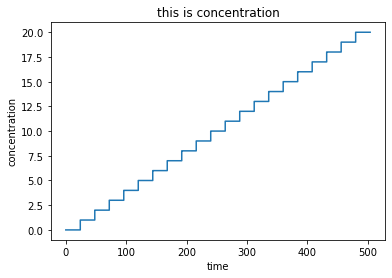

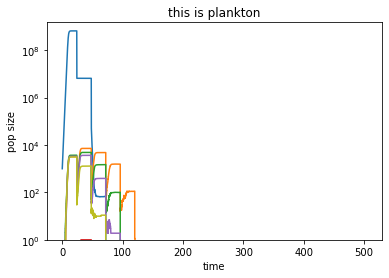

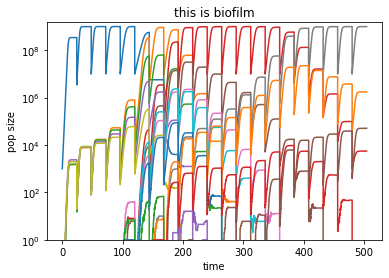

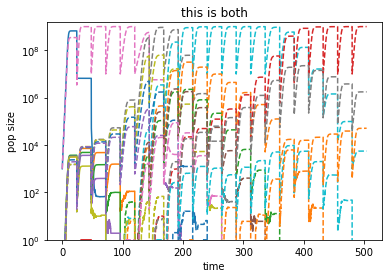

finished in  30.12749409675598
all saved as test0


In [42]:
imp.reload(bio)

name='test'
for i in range (1):
    print ('running simulation no:',i)
    [plankton_p, biofilm_p, time_r, conc_r]=passage_experiment(name=name+str(i), concentration_gradient=[0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20])
    np.savetxt(name+'_time.txt', time_r)
    np.savetxt(name+'_conc.txt', conc_r)
    
    

### concentration gradient exponential

running simulation no: 0
starting
cost vector length does not match the number of loci
benefit vector length does not match the number of loci
z_mic plankton: [  1.   5.   4.  20.   3.  15.  12.  60.   2.  10.   8.  40.   6.  30.
  24. 120.]
z_mic biofilm: [  6.  10.   9.  25.   8.  20.  17.  65.   7.  15.  13.  45.  11.  35.
  29. 125.]
running stochastic simulation
initiated
[[1. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 0. 1.]]
propensities are 0
propensities are 0
propensities are 0
propensities are 0
propensities are 0
[[1000.    0.    0. ...    0.    0.    0.]
 [1028.    0.    0. ...    0.    0.    0.]
 [1052.    0.    0. ...    0.    0.    0.]
 ...
 [   0.    0.    0. ...    0.    0.    0.]
 [   0.    0.    0. ...    0.    0.    0.]
 [   0.    0.    0. ...    0.    0.    0.]]


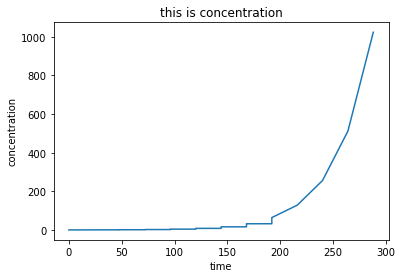

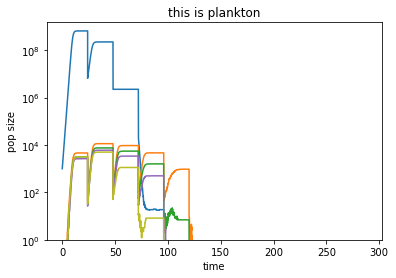

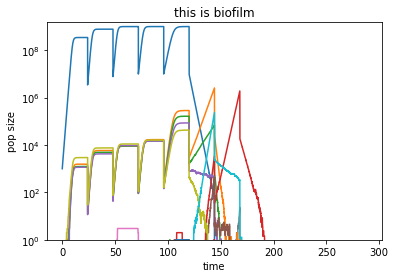

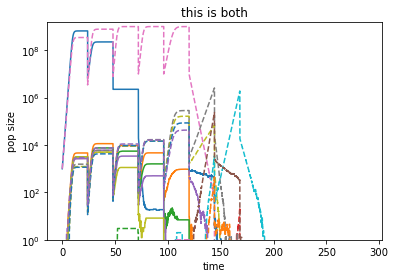

finished in  11.77358627319336
all saved as test0


In [43]:
imp.reload(bio)

name='test'
for i in range (1):
    print ('running simulation no:',i)
    [plankton_p, biofilm_p, time_r, conc_r]=passage_experiment(name=name+str(i), concentration_gradient=[0,0.5,1,2,4,8,16,32,64,128,256,512,1024])
    np.savetxt(name+'_time.txt', time_r)
    np.savetxt(name+'_conc.txt', conc_r)

In [ ]:
    if serial ==1:
        out_file = open(name+'_input.txt','w')
        out_file.write(
"""
INPUT DATA
loci: %s
mutation rate: %s
benefit vector: %s
cost vector: %s

biofilm_benefit: %s
biofilm_cost: %s
psi_max_s: %s
psi_min: %s
gamma: %s
release_rate: %s
adhesion_rate: %s
MIC = 1.0
    
PROPERTIES OF THE EXPERIMENT, INCLUDING THE DRUG PARAMETERS 
kappa %s
cycle_length  %s
init_conc  %s
car_cap %s
    
degradation_rate %s
cycle_number %s

random seed number: %s
"""% (loci, mutation_rate, benefit_vector, cost_vector, biofilm_benefit, biofilm_cost, psi_max_s, psi_min, gamma, release_rate, adhesion_rate, MIC,kappa,cycle_length,init_conc,car_cap,degradation_rate,cycle_number,random seed number))
        out_file.close()

